In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
data=pd.read_csv('datasets_13720_18513_insurance(1).csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Domain Analysis

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [140]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [141]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [142]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [143]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# EDA

<Axes: xlabel='age', ylabel='Count'>

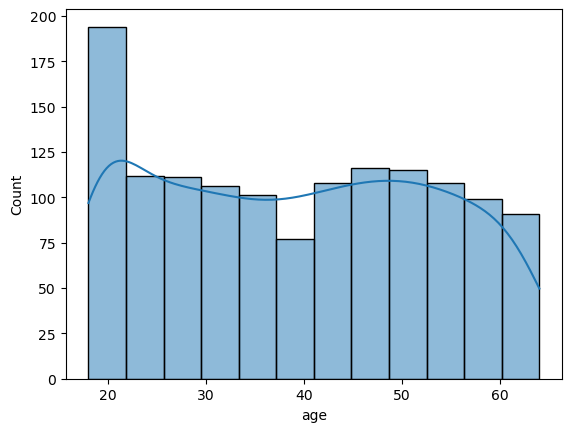

In [144]:
sns.histplot(x=data.age, kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

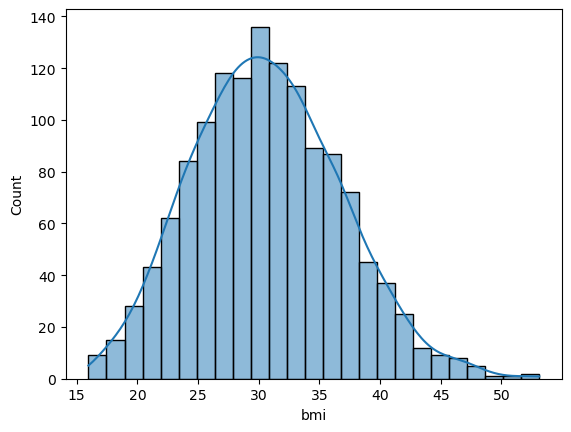

In [145]:
sns.histplot(x=data.bmi,kde=True)

<Axes: xlabel='charges', ylabel='Count'>

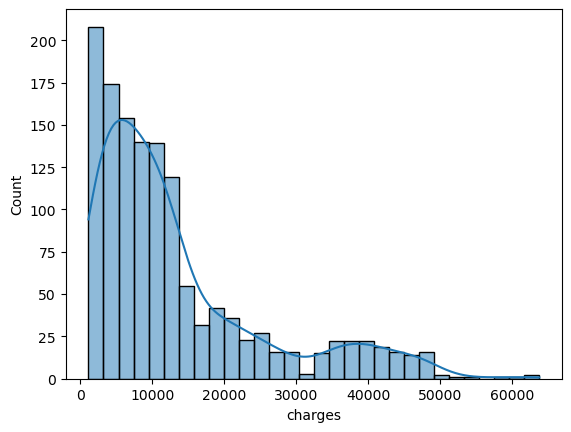

In [166]:
sns.histplot(x=data.charges,kde=True)

<Axes: xlabel='age', ylabel='charges'>

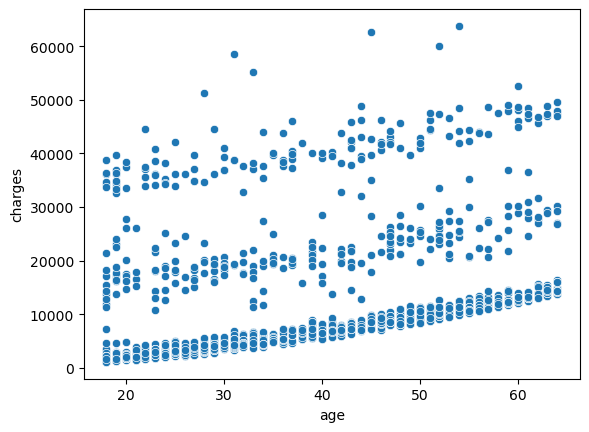

In [146]:
sns.scatterplot(x='age',y='charges',data=data)

<Axes: xlabel='children', ylabel='charges'>

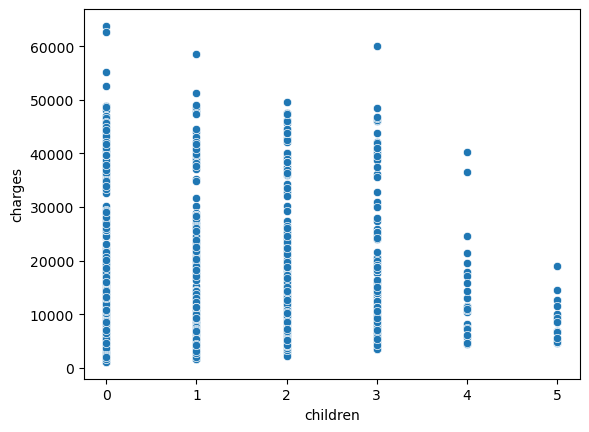

In [147]:
sns.scatterplot(x='children',y='charges',data=data)

<Axes: xlabel='bmi', ylabel='charges'>

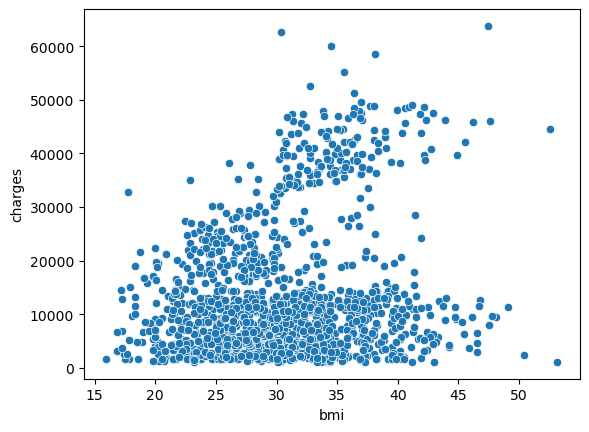

In [148]:
sns.scatterplot(x='bmi',y='charges',data=data)

<Axes: xlabel='age'>

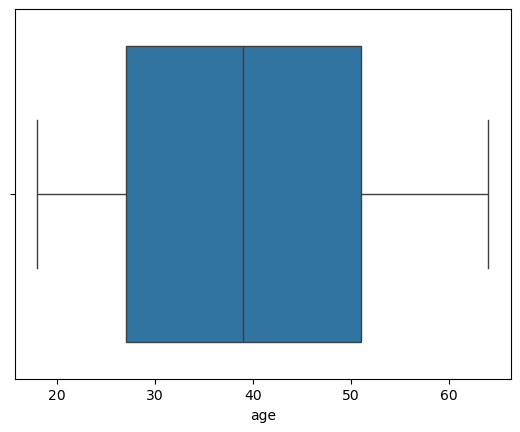

In [149]:
sns.boxplot(x='age',data=data)

<Axes: xlabel='bmi'>

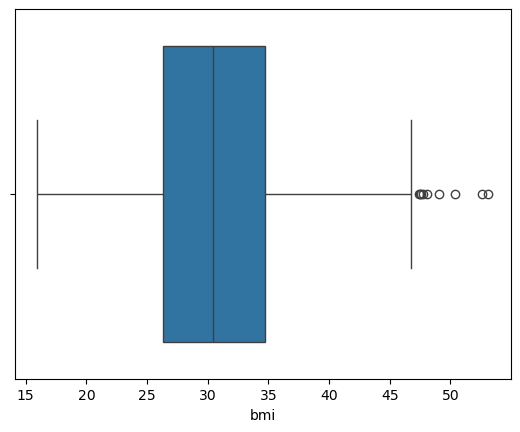

In [150]:
sns.boxplot(x='bmi',data=data) # outliers seen in bmi column

<Axes: xlabel='children'>

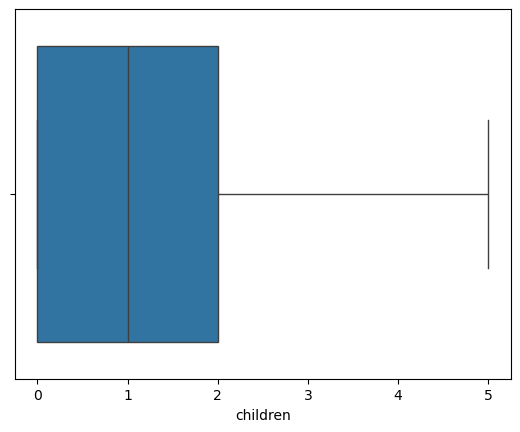

In [151]:
sns.boxplot(x='children',data=data)

In [152]:
charges=data['charges'].groupby(data['region']).sum().sort_values(ascending=True)
charges.head()

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_8136\3346084754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges.index,y=charges,palette='cool')


<Axes: xlabel='region', ylabel='charges'>

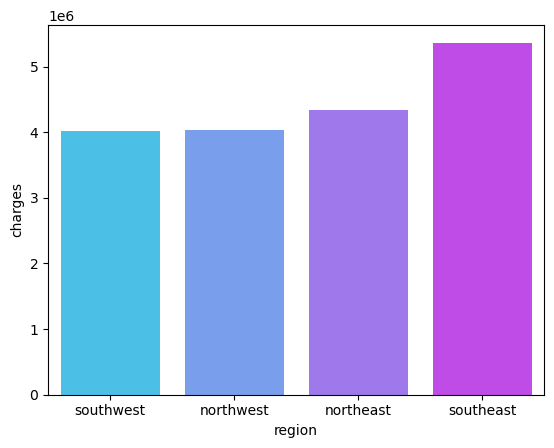

In [153]:
sns.barplot(x=charges.index,y=charges,palette='cool')

<Axes: xlabel='region', ylabel='charges'>

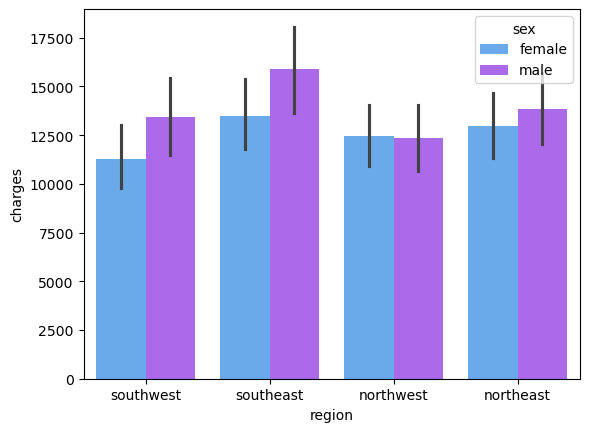

In [154]:
sns.barplot(x='region',y='charges',data=data,hue='sex',palette='cool')

<Axes: xlabel='region', ylabel='charges'>

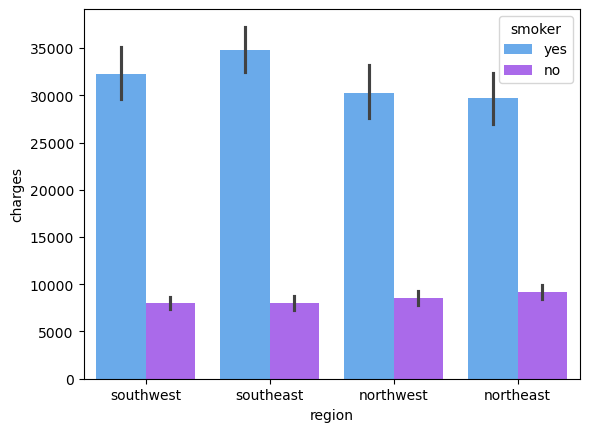

In [155]:
sns.barplot(x='region',y='charges',hue='smoker',data=data,palette='cool')

<Axes: xlabel='region', ylabel='charges'>

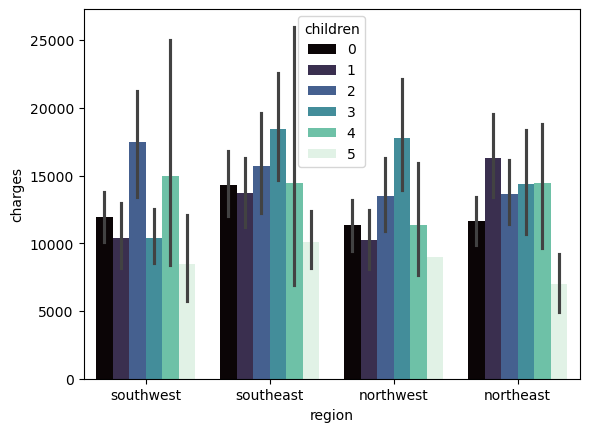

In [156]:
sns.barplot(x='region',y='charges',data=data,hue='children',palette='mako')

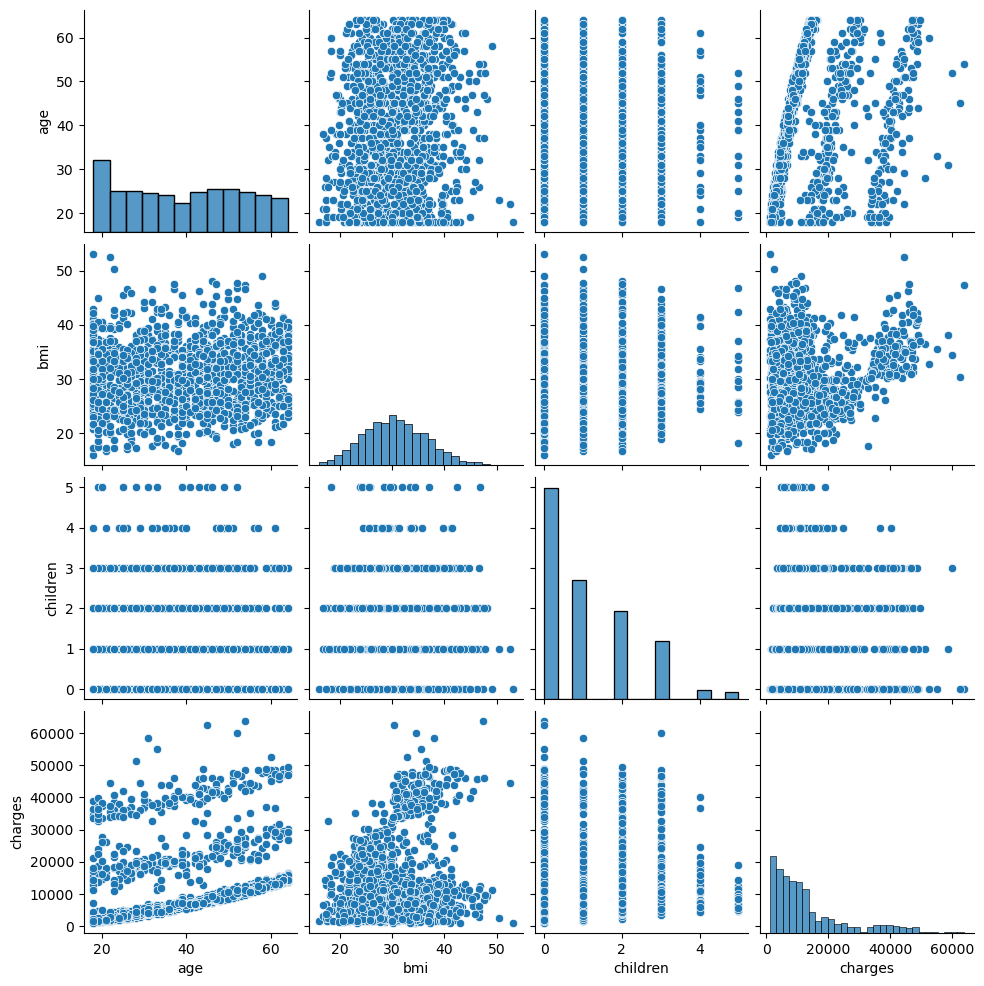

In [157]:
sns.pairplot(data)

# Data Preprocessing and Feature Engineering

In [158]:
# Step 1-Finding missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [159]:
duplicates = data.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 1


In [160]:
#Step 2- Converting categorical data to numerical
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [161]:
data['sex']=label_encoder.fit_transform(data['sex'])
data['smoker']=label_encoder.fit_transform(data['smoker'])
data['region']=label_encoder.fit_transform(data['region'])

<Axes: xlabel='bmi'>

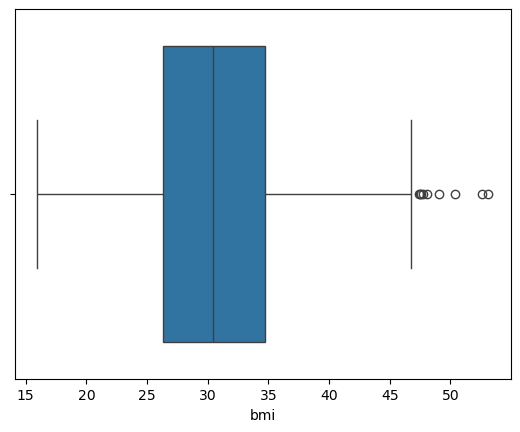

In [162]:
# Step 3 Checking the outlier
sns.boxplot(x='bmi',data=data)

In [163]:
#Replace outliers with median
data.loc[data['bmi']>47,'bmi']=np.median(data['bmi'])

<Axes: >

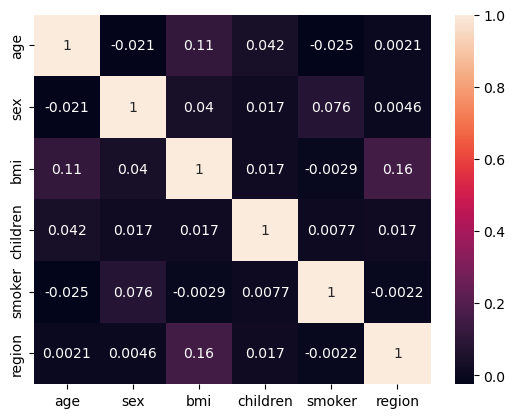

In [164]:
sns.heatmap(data.drop('charges',axis=1).corr(),annot=True)

# Model Creation

In [167]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error
X=data.drop(['charges'],axis=1)
y=data['charges']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [168]:
#Compare between models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

#Scale faetures
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

models={
    "LR":LinearRegression(),
    "KNN":KNeighborsRegressor(),
    "GBR":GradientBoostingRegressor(n_estimators=100, max_depth=3),
    "SVR":SVR(),
    "RandomForest":RandomForestRegressor(n_estimators=100, max_depth=6),
    "DTR":DecisionTreeRegressor()
}

for name,model in models.items():
    print(f'Training model {name} \n -----------------------------------------------------------------------------------')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    
    print(f'Score is {model.score(x_test, y_test)}')
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')
    print(f'MSE is :{mean_squared_error(y_test, y_pred)}')
    print(f'MAE is : {mean_absolute_error(y_test, y_pred)}')
    print()
 

Training model LR 
 -----------------------------------------------------------------------------------
Score is 0.760622762802183
Training R-squared: 0.7437175134042258
Testing R-squared: 0.760622762802183
MSE is :35098521.72973798
MAE is : 4228.967017880029

Training model KNN 
 -----------------------------------------------------------------------------------
Score is 0.8215563400406296
Training R-squared: 0.8633818880094053
Testing R-squared: 0.8215563400406296
MSE is :26164178.139637467
MAE is : 3098.8305375995023

Training model GBR 
 -----------------------------------------------------------------------------------
Score is 0.8646441872713508
Training R-squared: 0.905158248838461
Testing R-squared: 0.8646441872713508
MSE is :19846452.360785116
MAE is : 2485.9568704396966

Training model SVR 
 -----------------------------------------------------------------------------------
Score is -0.07838711345824212
Training R-squared: -0.09677418329314347
Testing R-squared: -0.0783871134

# From The above metrics we observe that Random Forest model appears to be the better-performing model overall due to its slightly better R-squared scores and lower MSE. However, both models are performing quite similarly, and the differences are not substantial.